In [2]:
# In Class Lab 4 
# Surface Brightness Profiles


In [3]:
# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
get_ipython().magic('matplotlib inline')


In [29]:
# Read in the provided file
# mass profile of the bulge  M(r) 
# Headers:   'Bulge' for mass profiles
#            'R' for radius 
# usage :   Mass = BulgeMass['Bulge']   Radius = BulgeMass['R']
BulgeMass = np.genfromtxt('BulgeMass.dat',dtype=None,names=True) 

# storing data from file 
Mass = BulgeMass['Bulge']
R = BulgeMass['R']

In [30]:
# Total Bulge mass 
Btot = 0.96e10

# set a mass to light ratio, say 1.5
ML = 1.5

In [31]:
# Determine Re: The Half Mass Radius
def HalfMassRadius(Bmass,R,tot):
    # input, Bulge mass profile, Radius, Total Mass of Bulge
    # returns: Radius where mass is half the total mass 
  
    # half the total mass in units of 1e10
    HalfMass= tot/2.0/1e10
    
    # find where mass profile yields half the total mass 
    # note the use of "np.logical_and"   
    index = np.where( np.logical_and(Bmass/1e10 < (Half+0.1), Bmass/1e10 > (Half-0.1)))
 
    return R[index]


In [32]:
#Determine Half Mass Radius for Bulge 
Re = HalfMass(BulgeMass['Bulge'],BulgeMass['R'],Btot)
print(Re)

[ 2.]


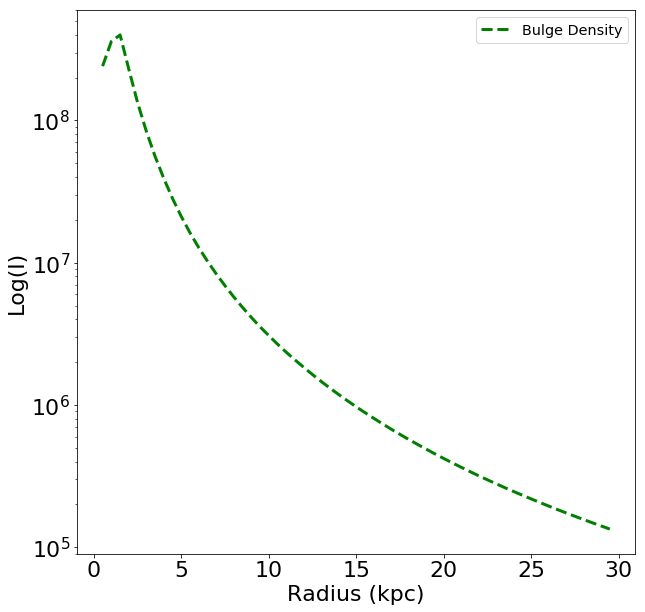

In [21]:
# Plot the Bulge density profile vs 
# the Sersic profile
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# bulge luminositiy density :   bulge mass profile/ Volume  
BulgeI = BulgeMass['Bulge']/4.0*3.0/R**3/np.pi*ML

# plot the bulge luminosity density as a proxy for surface brighntess
plt.semilogy(R,BulgeI, color='green', linestyle="--",linewidth=3, label='Bulge Density')


# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)', fontsize=22)


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')


# Save to a file
ax.set_rasterized(True)
plt.savefig('BulgeSersicProfile.eps', rasterized=True, dpi=350)